In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ATML/

/content/drive/MyDrive/ATML


In [ ]:
import os
import string
from pathlib import Path

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import spacy

from gensim.models import Word2Vec
import nltk
import re
import pandas as pd

from nltk import ngrams

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from pprint import pprint

import numpy as np
import pickle

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, KMeans

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
rootdir = '/content/drive/MyDrive/ATML/Datasets/TREC_4_5/'
iterable_lines = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      #print("Parsing through:", os.path.join(subdir, file))
      f = open((str(subdir)+"/"+str(file)), 'r', encoding="ISO-8859-1")
      lines = f.read()
      f.close()
      iterable_lines += [lines]

In [ ]:
processed_articles = []
for i in iterable_lines:
  processed_article = i.lower()
  processed_article = re.sub(r"\[.*?\]", '', processed_article)
  processed_article = re.sub(r"https?://\S+|www\.\S+", '', processed_article)
  processed_article = re.sub(r"<.*?>+", '', processed_article)
  processed_article = re.sub(r"[%s]" % re.escape(string.punctuation), '', processed_article)
  processed_article = re.sub(r"\n", ' ', processed_article)
  processed_article = re.sub(r"\w*\d\w*", '', processed_article)
  processed_article = re.sub(r" +", ' ', processed_article)
  processed_articles += [processed_article]

In [ ]:
tokenized_processed_articles = []

for i in range(len(processed_articles)):
  tokenized_processed_articles += [nltk.word_tokenize(processed_articles[i])]

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_processed_articles)]

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
model.save("test_doc2vec.model")
## Load saved doc2vec model
model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
model.wv.vocab

In [ ]:
similar_doc0 = model.docvecs.most_similar(0, topn=10)
print(similar_doc0)
similar_doc1 = model.docvecs.most_similar(1, topn=10)
print(similar_doc1)
similar_doc2 = model.docvecs.most_similar(2, topn=10)
print(similar_doc2)
similar_doc3 = model.docvecs.most_similar(3, topn=10)
print(similar_doc3)
similar_doc4 = model.docvecs.most_similar(4, topn=10)
print(similar_doc4)

similar_doc2000 = model.docvecs.most_similar(2000, topn=10)
print(similar_doc2000)
similar_doc2321 = model.docvecs.most_similar(2321, topn=10)
print(similar_doc2321)

[(1719, 0.9259120225906372), (1, 0.9208170771598816), (435, 0.8730108141899109), (331, 0.8703013062477112), (381, 0.8678396940231323), (33, 0.8667579889297485), (205, 0.8556736707687378), (17, 0.8493033647537231), (463, 0.848865270614624), (358, 0.848380982875824)]
[(1721, 0.9360358715057373), (0, 0.9208170771598816), (1720, 0.9058445692062378), (1719, 0.8986315727233887), (8, 0.8698457479476929), (875, 0.8672803640365601), (1722, 0.8636967539787292), (463, 0.8436306118965149), (33, 0.8352730870246887), (396, 0.8315575122833252)]
[(6, 0.8907309174537659), (3, 0.8883166909217834), (7, 0.8677631616592407), (9, 0.8658217191696167), (12, 0.8651233911514282), (192, 0.8499375581741333), (43, 0.8382378816604614), (168, 0.8359280228614807), (84, 0.8354265093803406), (10, 0.8349480628967285)]
[(7, 0.9296544194221497), (12, 0.9268221855163574), (2, 0.8883167505264282), (10, 0.8789518475532532), (5, 0.8712151050567627), (14, 0.8632982969284058), (13, 0.848289966583252), (2321, 0.825334906578064),

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link f

In [ ]:
"""X = []
Y = []

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=1, stop_words="english", ngram_range=(3, 3))
X += vectorizer.fit_transform(processed_articles)
Y.append(vectorizer.get_feature_names_out())

print(X[0])
print(Y[0])"""

In [ ]:
"""with open('X.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('Y.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)"""

In [ ]:
model = Word2Vec(sentences=tokenized_processed_articles, min_count=3)

In [ ]:
print(len(tokenized_processed_articles))

2322


In [ ]:
print(model.wv[model.wv.vocab])

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [ ]:
vectorized_docs = vectorize(tokenized_processed_articles, model=model)

In [ ]:
print(len(vectorized_docs))
print(vectorized_docs[0])

2322
[ 0.10668095  0.21685377  0.3814452  -0.10937795  0.28970343  0.25739247
 -0.26988423 -0.08210105 -0.28112382  0.165981   -0.3101984   0.10759725
 -0.08847609 -0.01950329 -0.2083244   0.04062411  0.08208811  0.07595492
 -0.19668502  0.12102334 -0.0939832  -0.09994192  0.00961801 -0.13717876
  0.02215265  0.01620639  0.05576458 -0.1288722  -0.2014965   0.20612912
  0.04390315 -0.09053916  0.23518729  0.2536686   0.24963814 -0.07496209
  0.17899428  0.12169539 -0.10910738  0.07794891  0.07933196 -0.16614404
 -0.17710504 -0.07673781  0.09598435 -0.00566482  0.1358918   0.10398067
  0.06321747 -0.08025536  0.11495183 -0.24047987  0.01256741  0.17859943
 -0.00905805  0.44615373  0.13726847 -0.0496012  -0.14516707  0.15225166
  0.09062134  0.21400875 -0.26505592  0.04304276 -0.10945289  0.12523264
 -0.32489845  0.15702198 -0.20492506  0.06766742  0.16488767 -0.04478546
  0.21743427  0.00696482  0.10480915 -0.24906096  0.03491632  0.35398495
  0.3265667   0.09780473  0.1170858  -0.055528

In [ ]:
def mbkmeans_clusters(
	X,
    k,
    mb,
    print_silhouette_values,
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=50,
    mb=500,
    print_silhouette_values=True,
)

For n_clusters = 50
Silhouette coefficient: 0.18
Inertia:3.7410214086777653
Silhouette values:
    Cluster 1: Size:5 | Avg:0.88 | Min:0.69 | Max: 0.93
    Cluster 10: Size:10 | Avg:0.41 | Min:-0.08 | Max: 0.62
    Cluster 46: Size:19 | Avg:0.40 | Min:0.08 | Max: 0.58
    Cluster 38: Size:18 | Avg:0.35 | Min:0.06 | Max: 0.54
    Cluster 6: Size:10 | Avg:0.34 | Min:-0.07 | Max: 0.58
    Cluster 9: Size:23 | Avg:0.31 | Min:0.02 | Max: 0.52
    Cluster 26: Size:50 | Avg:0.31 | Min:0.03 | Max: 0.51
    Cluster 47: Size:5 | Avg:0.31 | Min:-0.13 | Max: 0.51
    Cluster 8: Size:65 | Avg:0.29 | Min:0.01 | Max: 0.48
    Cluster 13: Size:27 | Avg:0.29 | Min:0.06 | Max: 0.48
    Cluster 33: Size:21 | Avg:0.29 | Min:0.04 | Max: 0.51
    Cluster 15: Size:48 | Avg:0.28 | Min:0.06 | Max: 0.48
    Cluster 16: Size:28 | Avg:0.28 | Min:0.03 | Max: 0.46
    Cluster 41: Size:30 | Avg:0.27 | Min:-0.07 | Max: 0.50
    Cluster 12: Size:62 | Avg:0.27 | Min:-0.10 | Max: 0.48
    Cluster 28: Size:76 | Avg:0.25 |

In [ ]:
print(clustering)
print(cluster_labels)

MiniBatchKMeans(batch_size=500, n_clusters=50)
[ 7  6 16  9 18 20 16 48 22 33 15 13  7  8 47  9 31 22 47 48 12 20 37 31
 13 32 37 40 12 20 31 22 48 12 19 19 20 43 32 33 40 31 45 13 32 17  0 49
 15 44 32 44 12  7 14 40 24  1 35 29 49 49 38 11 41 48 36 41 29 42 36 24
 29 10 29 36 35 46 42 28 41  8 14 29 10 36 29 10 30 10  1 38 28  1  1  7
  1 41 28 49 41 36 29  5 10 29 28 24 11 41  1 11 36 21 29 29 24 11 10 46
 28 24 35 24 29  1 35  1 29 39 19 24 10 28 42 29 46 29 41 46 21 11 12 15
  3  7 34 45 18  3 25 16 13 34 32  8  4 12 17  8 48 17 18 12  8 32  3 16
 44 13  0 33 44 31 13 18  2 40  3 20 44 32  3 44 27 34  3  8 31 13 44 26
 44 33 16 20 26 22  8 48 17 47 22 31 16 40 16 26 12 27 16  0 27 16 26 26
 32 33 32 26 16 17 48 19 12 32 45 32 22 33 31 31 34 18 12 17 48 49 34 22
 31 34 31  8 32  0 31 26 18 22 33 12 32 48 13 12 15 31  9 23 48  0 28 48
 32 12  0 17 19 20 40 26 17 48 31  8 26 26 17 18 12 14  0 22 31 27 48 12
 42 46  1 10 35  1 28  5 30 36 28 49 29 30 36 35 30 29  1 11  1 28 38 46
  1 

In [ ]:
vectorized_docs_array = np.asarray(vectorized_docs, dtype=np.float32)

[0.10668095 0.09112789 0.06969824 ... 0.18019256 0.19250341 0.14439012]


For n_clusters = 50 The average silhouette_score is : 0.2686087


ValueError: ignored

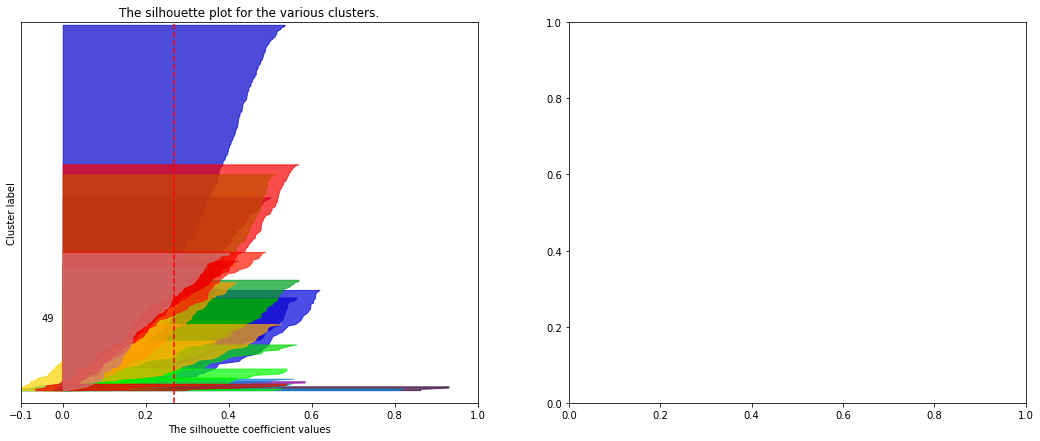

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, 300])

clusterer = KMeans(n_clusters=50, random_state=10)

cluster_labels = clusterer.fit_predict(vectorized_docs_array)

silhouette_avg = silhouette_score(vectorized_docs_array, cluster_labels)

print(
    "For n_clusters =",
    50,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(vectorized_docs_array, cluster_labels)

y_lower = 10
for i in range(50):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 50)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

# Label the silhouette plots with their cluster numbers at the middle
ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# Compute the new y_lower for next plot
y_lower = y_upper + 50  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / 50)

ax2.scatter(
    vectorized_docs_array, vectorized_docs_array, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for MbkMeans clustering on sample data with n_clusters = %d"
    % 50,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [ ]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

[('cpu', 0.8189672231674194), ('fixed', 0.7881187200546265), ('cache', 0.7878460884094238), ('configuration', 0.774992048740387), ('colour', 0.7695448398590088), ('mode', 0.7628228068351746), ('ram', 0.7591257095336914), ('timing', 0.7589978575706482), ('video', 0.7492378950119019), ('screen', 0.7475771903991699)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


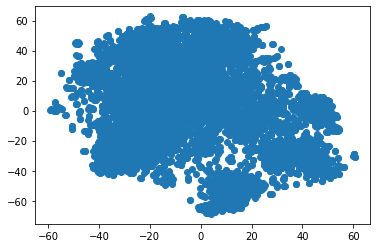

In [ ]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

# download example data ( may take a while)
train = fetch_20newsgroups()

def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

sentences = [line for text in train.data for line in clean(text)]

model = Word2Vec(sentences, workers=4, size=100, min_count=50, window=10, sample=1e-3)

print (model.wv.most_similar('memory'))

X = model.wv[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()